In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt 

In [11]:
districts = gpd.read_file(r'C:\Users\USER\Desktop\GeoSpatialViz\Shapefiles\districts.shp')

In [6]:
districts.head()

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


Basic Plotting in GeoPandas

<AxesSubplot:>

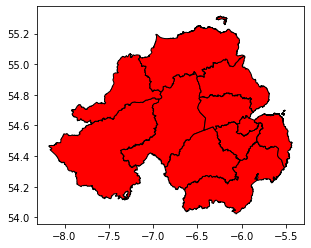

In [7]:
districts.plot(color = 'red', edgecolor = 'black')

<AxesSubplot:>

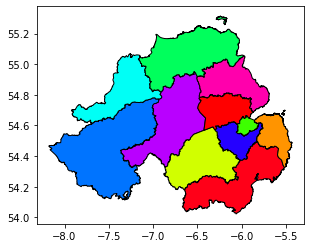

In [35]:
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')

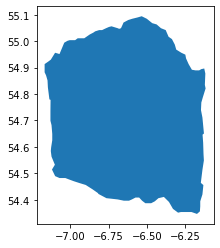

In [12]:
area_of_interest = gpd.read_file(r'C:\Users\USER\Desktop\GeoSpatialViz\Shapefiles\area_of_interest.shp')
area_of_interest.plot()

atms = gpd.read_file(r'C:\Users\USER\Desktop\GeoSpatialViz\Shapefiles\atms.shp')

Plot the Figures side by side

<AxesSubplot:>

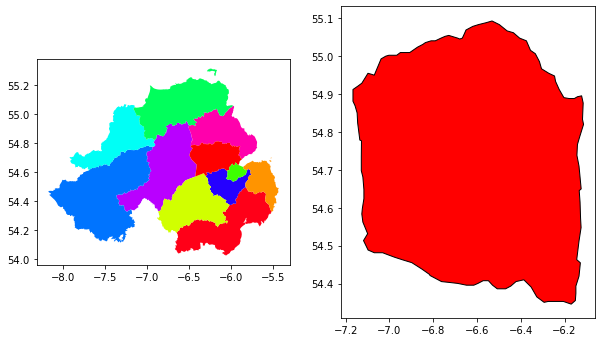

In [66]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,10) )
#fig,(ax1, ax2) = plt.subplots(nrows = 2, figsize = (10,10) )
districts.plot(ax = ax1, cmap = 'hsv', column = 'district')
area_of_interest.plot(ax = ax2, cmap = 'hsv', edgecolor = 'black')

<AxesSubplot:>

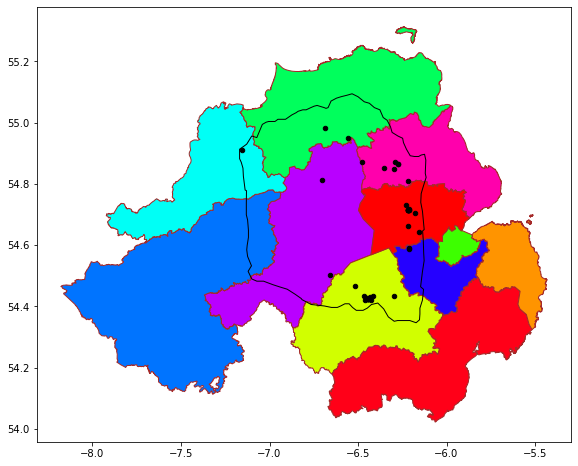

In [81]:
fig, ax = plt.subplots(figsize = (10,8))
districts.plot(ax = ax, cmap = 'hsv', column = 'district', edgecolor ='brown')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')
atms.plot(ax=ax, color='black', markersize = 20)

In [76]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Reprojecting GeoPandas GeoDataFrames, Changing the CRS and EPSG

<AxesSubplot:>

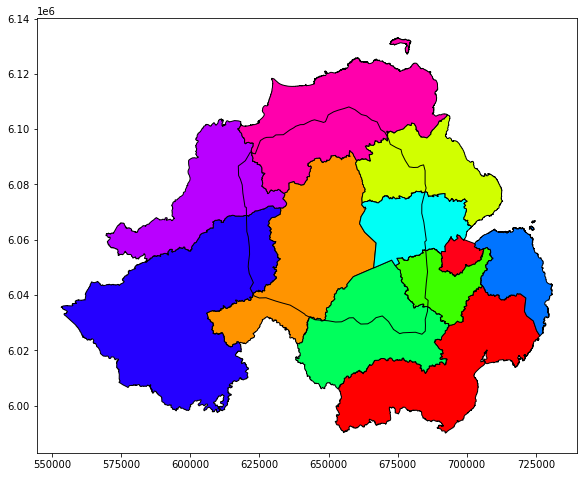

In [95]:
districts1 = districts.to_crs(epsg = 32629)
area_of_interest1 = area_of_interest.to_crs(epsg = 32629)

fig, ax = plt.subplots(figsize = (10,8))
districts1.plot(ax=ax, cmap = 'hsv', figsize = (10,10), edgecolor ='black')
area_of_interest1.plot(ax=ax,color = 'none', figsize = (10,10), edgecolor = 'black')

Intersecting Layers

<AxesSubplot:>

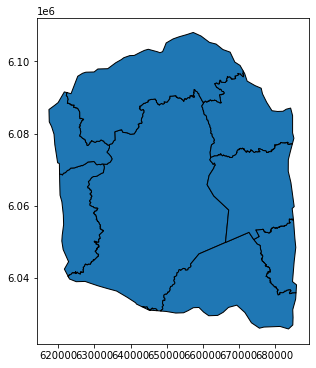

In [101]:
districts_intersect = gpd.overlay(districts1, area_of_interest1, how = 'intersection')
districts_intersect.plot(figsize =(6,6), edgecolor = 'black')

Calculating the areas of interesecting parts

In [104]:
districts_intersect['area'] = districts_intersect.area / 1000000
districts_intersect.head()
#unit is in sq. mtrs

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658017.072 6091916.291, 658023.630 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684916.646 6077240.234, 684908.771 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.696 6035736.759, 685894.090 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676032.651 6048086.094, 676033...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682226.240 6077404.748, 682239.947 6...",462.822918


Exporting GeoDataFrame into an ESRI shapefile

In [105]:
#districts_intersect.to_file('districts_intersected.shp', driver = 'ESRI Shapefile')